In [1]:
# Load plotting, algebra and EDO-solver libraries
from numpy import *
from pylab import *
from matplotlib import *
from scipy import *
from scipy.integrate import odeint
from random import *
from matplotlib.pyplot import *
#
rcParams['xtick.direction']  = 'out'
rcParams['ytick.direction']  = 'out'
rcParams['mathtext.fontset'] = 'cm'
rcParams['mathtext.rm']      = 'serif'
rcParams['text.usetex']      = True
rcParams['axes.labelsize']   = 26
rcParams['axes.titlesize']   = 22
rcParams['xtick.labelsize']  = 16
rcParams['ytick.labelsize']  = 16
rcParams['legend.fontsize']  = 18
#
# Plot figure inline
%matplotlib inline

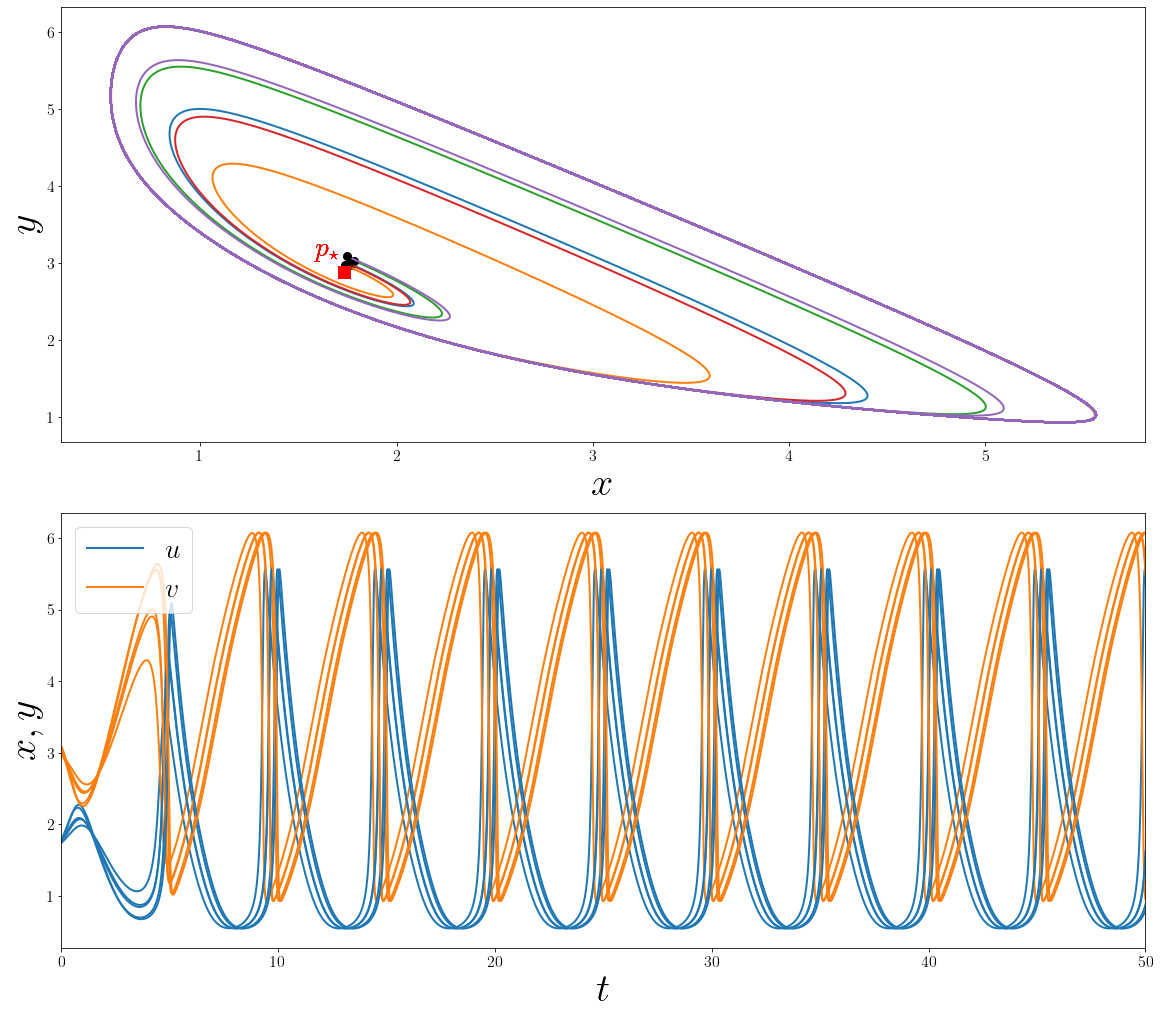

In [2]:
### Brusselator ###
# Define time array and parameter values
a = numpy.sqrt(3)
b = 5
 
time = numpy.linspace(0,300,50000)

# Define vector field
def fieldB(z,t):
    x  = z[0]
    y  = z[1]
    F  = a - (b+1)*x + x**2*y
    G  = b*x - x**2*y
    FG = [F,G]
    return FG
 
# Define a set of intial conditions
xstar = [a,b/a]
#
# Solve and plot for initial conditions in 'xinit'
fig = figure(figsize=(16, 14), constrained_layout=True)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
#
for ii in range(5):
    if (b > 1+a**2):
        L = 6
        xinit = xstar + 0.3*numpy.random.rand(5,2)
        xi = xinit[ii]
        x  = odeint(fieldB,xi,time)
        ax1.text(xstar[0]-0.15,xstar[1]+0.2,r'$p_\star$',color='r',fontsize=28)
    else:
        L = 5
        xinit = xstar + 0.2*numpy.random.rand(5,2)
        xi = xinit[ii]
        x  = odeint(fieldB,xi,time)
        ax1.text(xstar[0]-0.005,xstar[1]+0.03,r'$p_\star$',color='r',fontsize=28)
        #
    ax1.plot(x[:,0],x[:,1],'-',lw=2)
    ax1.plot(x[0,0],x[0,1],'ko',ms=8) #initial time
    ax1.plot(xstar[0],xstar[1],'rs',ms=12) 
    #
    if (ii == 0):
        ax2.plot(time,x[:,0],'-',lw=2,color='C0',label='$u$')
        ax2.plot(time,x[:,1],'-',lw=2,color='C1',label='$v$')
    else:
        ax2.plot(time,x[:,0],'-',lw=2,color='C0')
        ax2.plot(time,x[:,1],'-',lw=2,color='C1')
        #
    xlim(0,time[-1]/L)
    #
ax1.set_xlabel('$x$',fontsize=40)
ax1.set_ylabel('$y$',fontsize=40)
#
ax2.set_xlabel('$t$',fontsize=40)
ax2.set_ylabel('$x,y$',fontsize=40)
ax2.legend(loc=0,fancybox=True,fontsize=28)
#close()
show()